In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import mysql.connector
import os
import seaborn as sns

In [39]:
csv_files = [
    ('customers.csv','customers'),
    ('orders.csv','orders'),
    ('sellers.csv','sellers'),
    ('products.csv','products'),
    ('geolocation.csv','geolocation'),
    ('payments.csv','payments'),
    ('order_items.csv','order_items')
]

conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Lokesh@93#',
    database = 'ecommerce'
)

cursor = conn.cursor()

folder_path = 'C:/Users/Lokesh/Desktop/eCommerce'
          
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib as plt
import mysql.connector
import seaborn as sns

db = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Lokesh@93#',
    database = 'ecommerce'
)

cur = db.cursor()

# list all unique cities where customers are located

In [41]:
query = "select distinct customer_city from customers"

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [43]:
query = "select count(order_id) from orders where year(order_purchase_timestamp) = 2017"

cur.execute(query)

data = cur.fetchall()

data[0][0]

45101

In [3]:
query = """select a.product_category catagory, sum(c.payment_value) as total_sales from products a join order_items b on a.product_id = b.product_id
join payments c on b.order_id = c.order_id group by catagory"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["category","Total_sales"])
df

,category,Total_sales
0,perfumery,4.053909e+06
1,Furniture Decoration,1.144141e+07
2,telephony,3.895056e+06
3,bed table bath,1.370043e+07
4,automotive,6.818355e+06
...,...,...
69,cds music dvds,9.595440e+03
70,La Cuisine,2.330824e+04
71,Fashion Children's Clothing,6.285360e+03
72,PC Gamer,1.739544e+04


# 4. Calculate the percentage of orders that were paid in installments.

In [45]:
query = """select (sum(case when payment_installments>=1 then 1 else 0 end)/count(*))*100 as percent from payments"""

cur.execute(query)

data = cur.fetchall()
data


[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

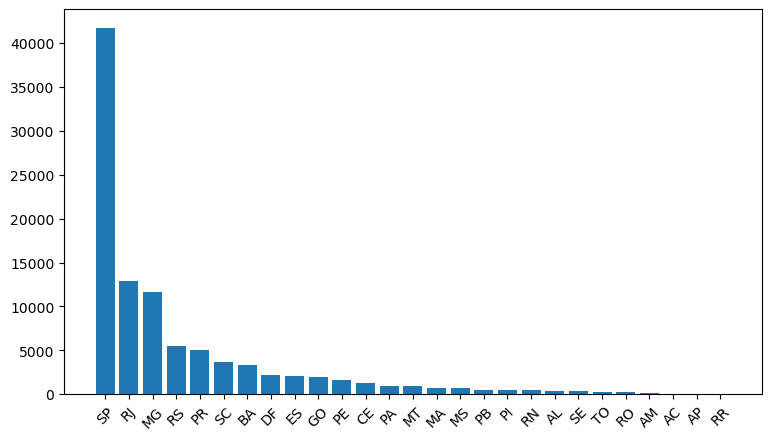

In [15]:
import matplotlib.pyplot as plt

query = """select customer_state, count(customer_id) as no_of_customers from customers group by customer_state order by no_of_customers desc"""

cur.execute(query)

data = cur.fetchall()


plt.figure(figsize = (9,5))
df = pd.DataFrame(data, columns = ["customer_state","no_of_customers"])

plt.bar(df["customer_state"],df["no_of_customers"])
plt.xticks(rotation = 45)
plt.show()

# Calculate the number of orders per month in 2018.

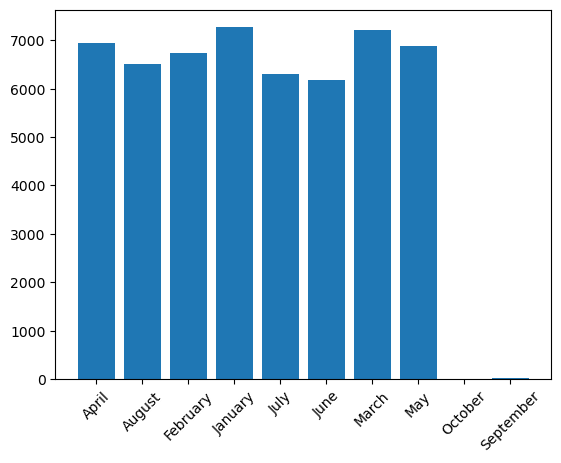

In [17]:
query = """select months,no_of_orders from (
select year(order_purchase_timestamp) as year,monthname(order_purchase_timestamp)as months , count(order_id) as no_of_orders 
from orders group by year, months) b where year=2018 order by months"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["months","order_counts"])

plt.bar(df["months"],df["order_counts"])
plt.xticks(rotation=45)
plt.show()

# Find the average number of products per order, grouped by customer city.

In [19]:
query = """with count_per_order as(
select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders from
customers join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer city", "average orders"])
df.head(10)

,customer city,average orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category

In [21]:
query = """ select a.product_category catagory, round((sum(c.payment_value)/(select sum(payment_value) from payments))*100,2) as percentage
 from products a join order_items b on a.product_id = b.product_id
join payments c on b.order_id = c.order_id group by catagory order by percentage desc"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["category", "percentage distribution"])
df

,category,percentage distribution
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [25]:
query = """ select a.product_category category,count(b.product_id) order_count, round(avg(b.price),2) price from products a join order_items b
 on a.product_id = b.product_id group by category"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["category", "order_count","price"])
df

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is ", a[0][1])
print("this shows that there is a neutral relationship between order count and price. there is no impact on order count of price")

the correlation between price and number of times a product has been purchased is  -0.10631514167157562
this shows that there is a neutral relationship between order count and price. there is no impact on order count of price


# Calculate the total revenue generated by each seller, and rank them by revenue

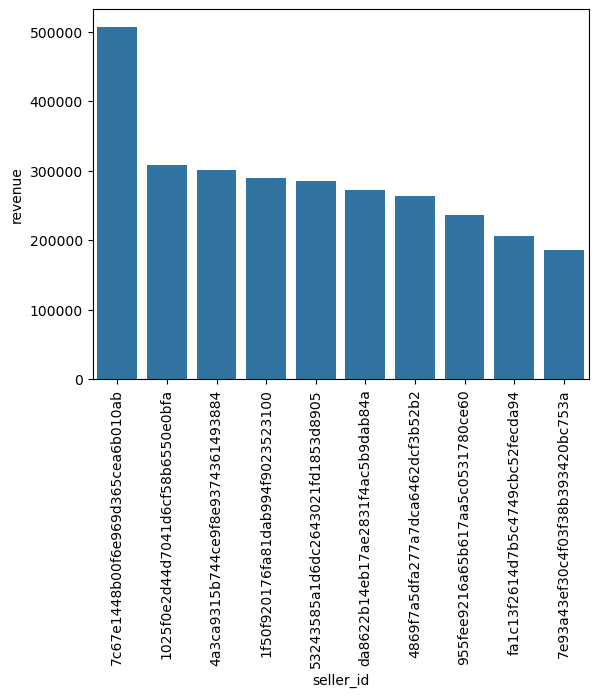

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
query = """  select *, dense_rank() over(order by revenue desc) as rnk from(
 select a.seller_id, round(sum(c.payment_value),2) revenue from sellers a join order_items b on a.seller_id = b.seller_id join payments c on 
 b.order_id = c.order_id group by a.seller_id) d"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["seller_id", "revenue","rank"])
df = df.head(10)
sns.barplot(x="seller_id", y="revenue", data = df)
plt.xticks(rotation = 90)
plt.show()


#  Calculate the moving average of order values for each customer over their order history.

In [29]:
query = """   select *, avg(payment_value) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row)
 as moving_avg
 from
 (select a.customer_id, a.order_purchase_timestamp, b.payment_value from orders a join payments b on a.order_id = b.order_id) c"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["customer_id", "history","order value","moving avg"])
df 

,customer_id,history,order value,moving avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

In [31]:
query = """select *, round(sum(payment) over(order by years, months),2) as cummulative_sum from (
 select year(a.order_purchase_timestamp) years, month(a.order_purchase_timestamp) as months , round(sum(b.payment_value),2) as payment
 from orders a join payments b on a.order_id = b.order_id group by months, years order by years,months)d"""

cur.execute(query)

data = cur.fetchall()
data

[(2016, 9, 252.24, 252.24),
 (2016, 10, 59090.48, 59342.72),
 (2016, 12, 19.62, 59362.34),
 (2017, 1, 138488.04, 197850.38),
 (2017, 2, 291908.01, 489758.39),
 (2017, 3, 449863.6, 939621.99),
 (2017, 4, 417788.03, 1357410.02),
 (2017, 5, 592918.82, 1950328.84),
 (2017, 6, 511276.38, 2461605.22),
 (2017, 7, 592382.92, 3053988.14),
 (2017, 8, 674396.32, 3728384.46),
 (2017, 9, 727762.45, 4456146.91),
 (2017, 10, 779677.88, 5235824.79),
 (2017, 11, 1194882.8, 6430707.59),
 (2017, 12, 878401.48, 7309109.07),
 (2018, 1, 1115004.18, 8424113.25),
 (2018, 2, 992463.34, 9416576.59),
 (2018, 3, 1159652.12, 10576228.71),
 (2018, 4, 1160785.48, 11737014.19),
 (2018, 5, 1153982.15, 12890996.34),
 (2018, 6, 1023880.5, 13914876.84),
 (2018, 7, 1066540.75, 14981417.59),
 (2018, 8, 1022425.32, 16003842.91),
 (2018, 9, 4439.54, 16008282.45),
 (2018, 10, 589.67, 16008872.12)]

# Calculate the year-over-year growth rate of total sales.

In [33]:
query = """with a as(
 select year(a.order_purchase_timestamp) years, round(sum(b.payment_value),2) as payment
 from orders a join payments b on a.order_id = b.order_id group by  years order by years)
 
 select years, ((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years))*100 as yoy_growth from a
 
 """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['year', 'yoy % growth'])
df

,year,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [35]:
query = """
with a as(select customer_id, min(order_purchase_timestamp) as first_order from orders group by customer_id),
 
  b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order 
 from a join orders 
 on a.customer_id=orders.customer_id and orders.order_purchase_timestamp > first_order 
 and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
 group by a.customer_id )
 
 select 100*(count(distinct a.customer_id)/count(distinct b.customer_id)) as retention_rate from a left join b on a.customer_id = b.customer_id
 
 """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['retention rate'])
df

,retention rate
0,None


#  Identify the top 3 customers who spent the most money in each year.

In [37]:
query = """select years, customer_id,payment, d_rank from (
 select year(a.order_purchase_timestamp) years, a.customer_id,sum(b.payment_value) as payment,
 dense_rank() over(partition by year(a.order_purchase_timestamp) order by sum(b.payment_value) desc) as d_rank
 from orders a join payments b on a.order_id = b.order_id group by years, a.customer_id) c where d_rank <= 3
 """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['year','customer_id','payment','rank'])
df

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3
